# Machine Learning Project - Ames Housing Data

Data from Ames, Iowa containing about $2500$ house sale records between $2006-2010$. 

Zillow like, or college student? consultant advertising to college students? (who is living in Ames, Iowa? are they working at university) providing housing 

To do:
- do exploratory data analysis 
  (meeting next week to cover eda, meet with vinod 6am to 8am)
- build descriptive machine learning models to understand the local housing market.
- missing data, data wrangling (Nick does NA, I do realestate)
- feature selection
- try using all variables to select the best ones
- build predictive machine learning models for the local house price prediction.
- merge real_estate data and use in model

Agenda:
- Dec 1st
- blog writing
- determine best model, features (look at correlation of variables to avoid overfitting
- determine if different features are important for different home buyers (college student rentals may want different features than families, professors, retired ppl


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 

import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.metrics import mean_squared_error


In [2]:
housing = pd.read_csv('data/Ames_HousePrice.csv', index_col=0)
real_estate = pd.read_csv('data/Ames Real Estate Data.csv', index_col=0)
housing.shape

/tmp/ipykernel_73689/3727374633.py:2: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate = pd.read_csv('data/Ames Real Estate Data.csv', index_col=0)


(2580, 81)

In [3]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [4]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [5]:
real_estate.columns

Index(['GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr', 'ZngCdSc',
       'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr', 'SchD_S',
       'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2', 'MA_City',
       'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo', 'Inst1_No',
       'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S', 'OthAc_S',
       'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D', 'X2TSc_D',
       'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S', 'ImpAcX1S',
       'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S', 'AcreX_S1',
       'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType', 'BldgNo_S',
       'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle', 'Foundation',
       'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating', 'Central Air',
       'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea',
       'GarageType', 'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY',
       'MoSold_MM', 'SalePrice', 

<Axes: >

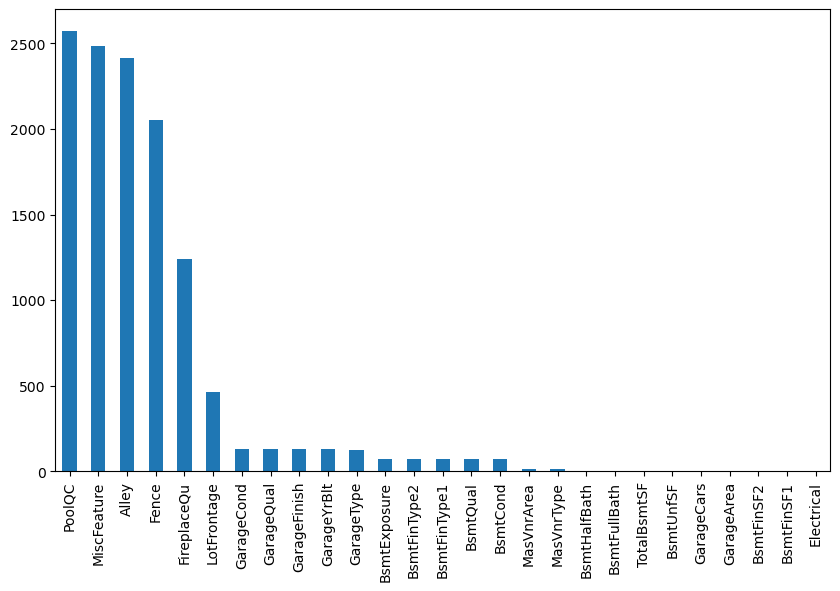

In [6]:
#The following chunks of code regarding missing values
#   were written by chui, copied from Ames Housing ML Project
missing_values=housing.isna().sum()
missing_values_features=missing_values[missing_values>0].sort_values(ascending=False)

missing_values_features.plot(kind='bar', figsize=(10,6))

In [7]:
missing_values_features

PoolQC          2571
MiscFeature     2483
Alley           2412
Fence           2055
FireplaceQu     1241
LotFrontage      462
GarageCond       129
GarageQual       129
GarageFinish     129
GarageYrBlt      129
GarageType       127
BsmtExposure      71
BsmtFinType2      70
BsmtFinType1      69
BsmtQual          69
BsmtCond          69
MasVnrArea        14
MasVnrType        14
BsmtHalfBath       2
BsmtFullBath       2
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Electrical         1
dtype: int64

In [8]:
# Identify garage-related features
garage_features = [col for col in housing.columns if 'Garage' in col]

# Create a new DataFrame with only the identified garage-related features
garage_df = housing[garage_features]

# Find rows with NaN values in garage-related features
rows_with_garage_nan = garage_df[garage_df.isna().any(axis=1)]

rows_with_garage_nan.head(5)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
18,NaN,NaN,NaN,0.0,0.0,NaN,NaN
23,NaN,NaN,NaN,0.0,0.0,NaN,NaN
45,NaN,NaN,NaN,0.0,0.0,NaN,NaN
49,NaN,NaN,NaN,0.0,0.0,NaN,NaN
51,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [9]:
#Continued missing value handling by chui
#   Fill NaN with 'None' for categorical columns
categorical = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageCond','GarageQual',
               'GarageFinish', 'GarageType', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2',
              'BsmtExposure']

housing[categorical]=housing[categorical].fillna('None')

numerical_features = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2']
housing[numerical_features] = housing[numerical_features].fillna(0)

#Dropping columns with too many NaN
housing=housing.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

#Filling in the single values with mode or mean
mode_electrical = housing['Electrical'].mode()[0]
housing['Electrical'].fillna(mode_electrical, inplace=True)

mode_garagecars = housing['GarageCars'].mode()[0]
housing['GarageCars'].fillna(mode_garagecars, inplace=True)

mode_bsmthalfbath = housing['BsmtHalfBath'].mode()[0]
housing['BsmtHalfBath'].fillna(mode_bsmthalfbath, inplace=True)

mode_bsmtfullbath = housing['BsmtFullBath'].mode()[0]
housing['BsmtFullBath'].fillna(mode_bsmtfullbath, inplace=True)

mean_totalbsmtsf = housing['TotalBsmtSF'].mean()
housing['TotalBsmtSF'].fillna(mean_totalbsmtsf, inplace=True)

mean_bsmtunfsf = housing['BsmtUnfSF'].mean()
housing['BsmtUnfSF'].fillna(mean_bsmtunfsf, inplace=True)

mean_garagearea = housing['GarageArea'].mean()
housing['GarageArea'].fillna(mean_garagearea, inplace=True)

median_lotfrontage = housing['LotFrontage'].median()
housing['LotFrontage'].fillna(median_lotfrontage, inplace=True)

housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(housing['YearBuilt'])

# Calculate the mean of the 'GarageArea' column
mean_garage_area = housing['GarageArea'].mean()

# Fill NaN values in 'GarageArea' with the mean
housing['GarageArea'].fillna(mean_garage_area, inplace=True)

In [10]:
real_estate.head()

,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
MapRefNo,,,,,,,,,,,,,,,,,,,,,
520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4599.0,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4507.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4513.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,ASSOCIATION COMMON AREA,...,3449.0,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,...,4506.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


/tmp/ipykernel_73689/746776238.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing_features.corr()


,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
GrLivArea,1.000000,0.070785,0.310869,0.260322,0.559897,-0.105670,0.228400,0.306035,0.385898,0.165303,...,0.477107,0.247716,0.321777,0.000196,0.008714,0.097835,0.057935,-0.003940,0.038389,-0.008260
MSSubClass,0.070785,1.000000,-0.406812,-0.198040,0.056468,-0.075542,0.053852,0.056756,0.018243,-0.073712,...,-0.091176,-0.017656,-0.007649,-0.028535,-0.041798,-0.055099,-0.013431,-0.027226,0.007252,-0.025351
LotFrontage,0.310869,-0.406812,1.000000,0.340423,0.166707,-0.048473,0.093233,0.058972,0.183363,0.160373,...,0.313844,0.106466,0.130591,0.003447,0.030026,0.076586,0.086254,0.012161,0.002064,-0.002290
LotArea,0.260322,-0.198040,0.340423,1.000000,0.080607,-0.032693,0.012397,0.010293,0.103514,0.163632,...,0.199241,0.155687,0.084963,0.017694,0.017721,0.053820,0.052636,0.040220,0.010203,-0.017319
OverallQual,0.559897,0.056468,0.166707,0.080607,1.000000,-0.095927,0.574400,0.546297,0.401996,0.274344,...,0.538121,0.250181,0.286861,-0.134291,0.014226,0.049277,-0.002484,-0.025825,0.016780,0.005668
OverallCond,-0.105670,-0.075542,-0.048473,-0.032693,-0.095927,1.000000,-0.397274,0.065100,-0.142250,-0.064808,...,-0.168235,0.014161,-0.067437,0.085910,0.041904,0.050417,-0.021193,0.046015,0.012211,0.017632
YearBuilt,0.228400,0.053852,0.093233,0.012397,0.574400,-0.397274,1.000000,0.572276,0.302447,0.303842,...,0.462947,0.227289,0.179654,-0.360933,0.009513,-0.042655,0.004925,-0.027354,-0.007534,0.015349
YearRemodAdd,0.306035,0.056756,0.058972,0.010293,0.546297,0.065100,0.572276,1.000000,0.171725,0.157073,...,0.348409,0.218273,0.226677,-0.205205,0.028543,-0.043130,-0.018693,-0.016669,0.002476,0.064046
MasVnrArea,0.385898,0.018243,0.183363,0.103514,0.401996,-0.142250,0.302447,0.171725,1.000000,0.276034,...,0.347303,0.149983,0.119097,-0.102313,0.011964,0.064982,-0.003637,-0.021630,-0.007766,-0.020050
BsmtFinSF1,0.165303,-0.073712,0.160373,0.163632,0.274344,-0.064808,0.303842,0.157073,0.276034,1.000000,...,0.298559,0.217652,0.100634,-0.107225,0.044379,0.102201,0.017803,0.014607,-0.003553,0.014155


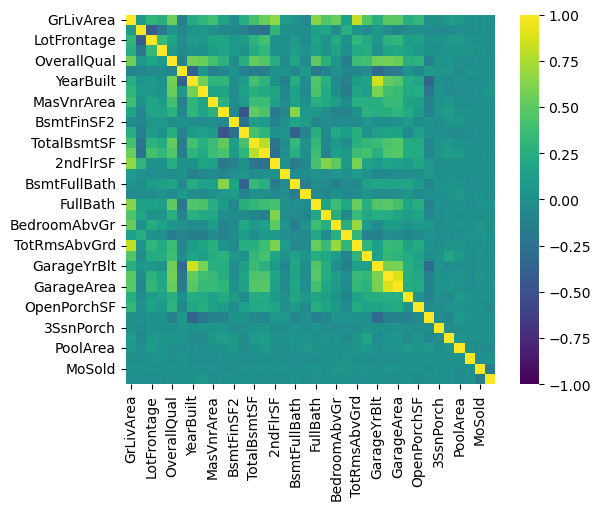

In [11]:
housing_features = housing.drop(columns=['SalePrice', 'PID'])
correlation_matrix = housing_features.corr()
sns.heatmap(correlation_matrix, vmax=1.0, vmin=-1.0,square=True, cmap='viridis')
correlation_matrix

In [12]:
corr_matrix = housing.corr()
corr_matrix

/tmp/ipykernel_73689/1253314489.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
PID,1.000000,-0.102270,-0.226276,-0.005328,-0.086113,0.042049,-0.247168,0.120013,-0.337963,-0.128744,...,-0.198946,-0.041876,-0.054843,0.168778,-0.021198,-0.031646,-0.006526,-0.022524,-0.059940,0.002238
GrLivArea,-0.102270,1.000000,0.719981,0.070785,0.310869,0.260322,0.559897,-0.105670,0.228400,0.306035,...,0.477107,0.247716,0.321777,0.000196,0.008714,0.097835,0.057935,-0.003940,0.038389,-0.008260
SalePrice,-0.226276,0.719981,1.000000,-0.084587,0.337988,0.274443,0.790501,-0.101091,0.544370,0.514309,...,0.634976,0.333232,0.306540,-0.123235,0.031260,0.121463,0.030844,-0.018877,0.012591,-0.001376
MSSubClass,-0.005328,0.070785,-0.084587,1.000000,-0.406812,-0.198040,0.056468,-0.075542,0.053852,0.056756,...,-0.091176,-0.017656,-0.007649,-0.028535,-0.041798,-0.055099,-0.013431,-0.027226,0.007252,-0.025351
LotFrontage,-0.086113,0.310869,0.337988,-0.406812,1.000000,0.340423,0.166707,-0.048473,0.093233,0.058972,...,0.313844,0.106466,0.130591,0.003447,0.030026,0.076586,0.086254,0.012161,0.002064,-0.002290
LotArea,0.042049,0.260322,0.274443,-0.198040,0.340423,1.000000,0.080607,-0.032693,0.012397,0.010293,...,0.199241,0.155687,0.084963,0.017694,0.017721,0.053820,0.052636,0.040220,0.010203,-0.017319
OverallQual,-0.247168,0.559897,0.790501,0.056468,0.166707,0.080607,1.000000,-0.095927,0.574400,0.546297,...,0.538121,0.250181,0.286861,-0.134291,0.014226,0.049277,-0.002484,-0.025825,0.016780,0.005668
OverallCond,0.120013,-0.105670,-0.101091,-0.075542,-0.048473,-0.032693,-0.095927,1.000000,-0.397274,0.065100,...,-0.168235,0.014161,-0.067437,0.085910,0.041904,0.050417,-0.021193,0.046015,0.012211,0.017632
YearBuilt,-0.337963,0.228400,0.544370,0.053852,0.093233,0.012397,0.574400,-0.397274,1.000000,0.572276,...,0.462947,0.227289,0.179654,-0.360933,0.009513,-0.042655,0.004925,-0.027354,-0.007534,0.015349
YearRemodAdd,-0.128744,0.306035,0.514309,0.056756,0.058972,0.010293,0.546297,0.065100,0.572276,1.000000,...,0.348409,0.218273,0.226677,-0.205205,0.028543,-0.043130,-0.018693,-0.016669,0.002476,0.064046


In [18]:
from sklearn.model_selection import train_test_split

#Select all features
#features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageCars']
X = housing[['TotalSF','OverallQual','GrLivArea','TotalBsmtSF','1stFlrSF',
                    'GarageCars','GarageArea','YearBuilt','FullBath','YearRemodAdd','MasVnrArea',
                    'TotRmsAbvGrd','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','OpenPorchSF',
                    'BsmtFullBath','HalfBath','LotArea','2ndFlrSF','BsmtUnfSF','BedroomAbvGr','ScreenPorch',
                    '3SsnPorch','PoolArea']]
y = housing['SalePrice']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['TotalSF'] not in index"

In [14]:
from lazypredict.Supervised import LazyRegressor

#from sklearn.preprocessing import LabelEncoder
#from sklearn.feature_selection import VarianceThreshold

reg = LazyRegressor(verbose=1, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)



 14%|██████▎                                     | 6/42 [00:00<00:01, 28.09it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7931684522262121, 'Adjusted R-Squared': 0.7911406919539201, 'RMSE': 35670.197958675904, 'Time taken': 0.07045531272888184}
{'Model': 'BaggingRegressor', 'R-Squared': 0.8339031410276746, 'Adjusted R-Squared': 0.8322747404495145, 'RMSE': 31965.23035027995, 'Time taken': 0.03534197807312012}
{'Model': 'BayesianRidge', 'R-Squared': 0.7897370704273343, 'Adjusted R-Squared': 0.787675669157014, 'RMSE': 35964.86911587915, 'Time taken': 0.056596994400024414}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.7269944880798656, 'Adjusted R-Squared': 0.7243179634531975, 'RMSE': 40981.026861146944, 'Time taken': 0.011848688125610352}
{'Model': 'DummyRegressor', 'R-Squared': -0.00601649773544688, 'Adjusted R-Squared': -0.015879404575990463, 'RMSE': 78668.28455033188, 'Time taken': 0.005141496658325195}
{'Model': 'ElasticNet', 'R-Squared': 0.7546718529597268, 'Adjusted R-Squared': 0.7522666750475673, 'RMSE': 38848.19257476673, 'Time taken': 0.0440487861633

 21%|█████████▍                                  | 9/42 [00:00<00:01, 17.30it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.06278784626766842, 'Adjusted R-Squared': 0.05359949181931223, 'RMSE': 75930.46937387664, 'Time taken': 0.07550692558288574}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.7345386364473563, 'Adjusted R-Squared': 0.7319360740595853, 'RMSE': 40410.831719752445, 'Time taken': 0.007279396057128906}
{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.830301799060573, 'Adjusted R-Squared': 0.8286380912082256, 'RMSE': 32309.909954683677, 'Time taken': 0.17166447639465332}
{'Model': 'GammaRegressor', 'R-Squared': 0.7353654777341987, 'Adjusted R-Squared': 0.7327710216335536, 'RMSE': 40347.84816036512, 'Time taken': 0.3973369598388672}


 29%|████████████▎                              | 12/42 [00:01<00:04,  7.15it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -27497.274973487853, 'Adjusted R-Squared': -27766.865904600476, 'RMSE': 13006182.804758815, 'Time taken': 0.2784602642059326}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8529525489009712, 'Adjusted R-Squared': 0.8515109072235297, 'RMSE': 30076.401867889148, 'Time taken': 0.1322169303894043}


 33%|██████████████▎                            | 14/42 [00:01<00:03,  7.60it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8351905171425693, 'Adjusted R-Squared': 0.833574737898869, 'RMSE': 31841.112040033946, 'Time taken': 0.18131136894226074}
{'Model': 'HuberRegressor', 'R-Squared': 0.772603976729235, 'Adjusted R-Squared': 0.7703746039520706, 'RMSE': 37401.46049047576, 'Time taken': 0.03708672523498535}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8257372829488943, 'Adjusted R-Squared': 0.8240288249385893, 'RMSE': 32741.560094837816, 'Time taken': 0.010284900665283203}


 45%|███████████████████▍                       | 19/42 [00:01<00:02, 11.50it/s]

{'Model': 'KernelRidge', 'R-Squared': -4.3762086202616315, 'Adjusted R-Squared': -4.428916547911255, 'RMSE': 181859.16178825276, 'Time taken': 0.15893340110778809}
{'Model': 'Lars', 'R-Squared': 0.7897831162576237, 'Adjusted R-Squared': 0.7877221664170121, 'RMSE': 35960.93089686618, 'Time taken': 0.007531404495239258}
{'Model': 'LarsCV', 'R-Squared': 0.7897831162576237, 'Adjusted R-Squared': 0.7877221664170121, 'RMSE': 35960.93089686618, 'Time taken': 0.013559103012084961}
{'Model': 'Lasso', 'R-Squared': 0.7897807140146058, 'Adjusted R-Squared': 0.7877197406225922, 'RMSE': 35961.136367156745, 'Time taken': 0.07825899124145508}
{'Model': 'LassoCV', 'R-Squared': 0.7896414497405971, 'Adjusted R-Squared': 0.7875791110125638, 'RMSE': 35973.04600800816, 'Time taken': 0.0842587947845459}


 50%|█████████████████████▌                     | 21/42 [00:01<00:01, 12.92it/s]

{'Model': 'LassoLars', 'R-Squared': 0.7896726932579647, 'Adjusted R-Squared': 0.7876106608389252, 'RMSE': 35970.374459306746, 'Time taken': 0.006009340286254883}
{'Model': 'LassoLarsCV', 'R-Squared': 0.7897831162576237, 'Adjusted R-Squared': 0.7877221664170121, 'RMSE': 35960.93089686618, 'Time taken': 0.008607864379882812}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7897831162576237, 'Adjusted R-Squared': 0.7877221664170121, 'RMSE': 35960.93089686618, 'Time taken': 0.017780303955078125}
{'Model': 'LinearRegression', 'R-Squared': 0.7897831162576238, 'Adjusted R-Squared': 0.7877221664170122, 'RMSE': 35960.930896866164, 'Time taken': 0.018367767333984375}
{'Model': 'LinearSVR', 'R-Squared': -5.317448194574691, 'Adjusted R-Squared': -5.379383961188168, 'RMSE': 197136.92281768814, 'Time taken': 0.00496983528137207}


 67%|████████████████████████████▋              | 28/42 [00:02<00:01,  8.73it/s]

{'Model': 'MLPRegressor', 'R-Squared': -5.317836718429539, 'Adjusted R-Squared': -5.379776294100417, 'RMSE': 197142.9846972044, 'Time taken': 0.8061065673828125}
{'Model': 'NuSVR', 'R-Squared': -0.03142627245706109, 'Adjusted R-Squared': -0.04153829473605186, 'RMSE': 79655.58351175603, 'Time taken': 0.15849041938781738}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.603347557997284, 'Adjusted R-Squared': 0.5994588085658848, 'RMSE': 49397.1843536608, 'Time taken': 0.004461050033569336}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7897831162576237, 'Adjusted R-Squared': 0.7877221664170121, 'RMSE': 35960.93089686617, 'Time taken': 0.007042884826660156}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7638461835624778, 'Adjusted R-Squared': 0.7615309500679923, 'RMSE': 38114.88492084232, 'Time taken': 0.018890857696533203}


 74%|███████████████████████████████▋           | 31/42 [00:04<00:02,  5.09it/s]

{'Model': 'PoissonRegressor', 'R-Squared': 0.851791223519579, 'Adjusted R-Squared': 0.8503381962991827, 'RMSE': 30194.934343571425, 'Time taken': 1.0894746780395508}


 76%|████████████████████████████████▊          | 32/42 [01:41<02:10, 13.00s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.09306188732631004, 'Adjusted R-Squared': -0.10377818033931296, 'RMSE': 82001.0671808803, 'Time taken': 97.84687185287476}
{'Model': 'RANSACRegressor', 'R-Squared': 0.7772643711693378, 'Adjusted R-Squared': 0.7750806885337431, 'RMSE': 37016.21208542876, 'Time taken': 0.0373988151550293}


 86%|████████████████████████████████████▊      | 36/42 [01:42<00:41,  6.86s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8399500137419056, 'Adjusted R-Squared': 0.8383808962295713, 'RMSE': 31377.977640001624, 'Time taken': 0.34848451614379883}
{'Model': 'Ridge', 'R-Squared': 0.7897682218335293, 'Adjusted R-Squared': 0.7877071259691522, 'RMSE': 35962.20483799528, 'Time taken': 0.005360841751098633}
{'Model': 'RidgeCV', 'R-Squared': 0.7896301743896535, 'Adjusted R-Squared': 0.7875677251189639, 'RMSE': 35974.01008406467, 'Time taken': 0.11043047904968262}
{'Model': 'SGDRegressor', 'R-Squared': 0.7921734974151233, 'Adjusted R-Squared': 0.7901359826838991, 'RMSE': 35755.89005138962, 'Time taken': 0.00794529914855957}


 90%|██████████████████████████████████████▉    | 38/42 [01:42<00:19,  4.93s/it]

{'Model': 'SVR', 'R-Squared': -0.08921080622337851, 'Adjusted R-Squared': -0.09988934353929402, 'RMSE': 81856.48643680924, 'Time taken': 0.19311308860778809}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7897831162576238, 'Adjusted R-Squared': 0.7877221664170122, 'RMSE': 35960.930896866164, 'Time taken': 0.007552385330200195}


 98%|█████████████████████████████████████████▉ | 41/42 [01:43<00:02,  3.00s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.7097414524519341, 'Adjusted R-Squared': 0.7068957804171492, 'RMSE': 42256.12197242593, 'Time taken': 0.5792443752288818}
{'Model': 'XGBRegressor', 'R-Squared': 0.8271327456361518, 'Adjusted R-Squared': 0.8254379686325847, 'RMSE': 32610.20250228697, 'Time taken': 0.15889692306518555}


100%|███████████████████████████████████████████| 42/42 [01:43<00:00,  2.46s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.8377322419702378, 'Adjusted R-Squared': 0.8361413815973969, 'RMSE': 31594.62801486856, 'Time taken': 0.10205841064453125}
                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
GradientBoostingRegressor                    0.85       0.85    30076.40   
PoissonRegressor                             0.85       0.85    30194.93   
RandomForestRegressor                        0.84       0.84    31377.98   
LGBMRegressor                                0.84       0.84    31594.63   
HistGradientBoostingRegressor                0.83       0.84    31841.11   
BaggingRegressor                             0.83       0.83    31965.23   
ExtraTreesRegressor                          0.83       0.83    32309.91   
XGBRegressor                                 0.83       0.83    32610.20   
KNeighborsRegressor                          0.82       0.83    32741.56   


In [15]:
#Code from Chui - Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a Linear Regression model
lm = LinearRegression()

# Fit the model with the training data
lm.fit(X_train, y_train)

# Print the coefficients and intercept
coefficients = lm.coef_
intercept = lm.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Make predictions on the test set
y_pred = lm.predict(X_test)

# Calculate the R-squared score
r2_value_calculated = r2_score(y_test, y_pred)
print("R-squared:", r2_value_calculated)

Coefficients: [2.22285980e+04 4.55898882e+01 3.15279461e+01 1.65115283e+01
 1.38192377e+04]
Intercept: -100112.95387303826
R-squared: 0.789783116257625


In [16]:
#Code from Chui - Ridge and Lasso models
from sklearn.linear_model import Ridge, Lasso

# Initialize Ridge and Lasso models
ridge_model = Ridge(alpha=10.0)  # You can adjust the alpha parameter
lasso_model = Lasso(alpha=100.0)  # You can adjust the alpha parameter

# Fit the models on the training data
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Make predictions using Ridge and Lasso models
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)


In [17]:
#Code from Chui - Grid search
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to search
alphas = [0.01, 0.1, 1, 10, 100]

# Create a grid search for Ridge and Lasso with cross-validation
ridge_grid = GridSearchCV(Ridge(), {'alpha': alphas}, cv=5)
lasso_grid = GridSearchCV(Lasso(), {'alpha': alphas}, cv=5)

# Fit the grid search on the training data
ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

# Get the best alpha value from grid search
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_lasso_alpha = lasso_grid.best_params_['alpha']

print("Best alpha for Ridge:", best_ridge_alpha)
print("Best alpha for Lasso:", best_lasso_alpha)

Best alpha for Ridge: 10
Best alpha for Lasso: 100


In [38]:
#from the project description, taking log in the lm function call, 
#   to improve results for the non-constant variance

#lm.fit(np.log10(grLivArea), np.log10(price))
#lm.score(np.log10(grLivArea), np.log10(price))

### Model Selection and Model Interpretation

The machine learning model that we chose is better because...

### Predictive Modeling Ideas

The goal of building a predictive model is to predict the house prices accurately (just like Zillow home price estimates), rather than to understand the housing market dynamics. So the so-called **black box** models can be considered if they offer better accuracies.

- Because the number of features is large, multi-collinearity plagues multiple linear regression.
- Ridge, Lasso, and linear kernel SVR are popular choices to start your research.
- Use Lasso for feature selection if it is warranted.
- On the other hand, non-linear models, particularly tree-based models, are popular choices.
- **Ensembles**: If you train multiple models, you can put them into an ensemble to improve accuracies.
- If you borrow your insights in data analysis to generate new features, be sure to prevent **data-leakage**, i.e. you avoid using the cv test set house price values in your feature engineering analysis.

### Practical Applications For Your Models

- **Student Apartment Rental**: A company would like to purchase multiple rental houses in **Ames** to rent to **ISU** students. Based on your data analysis and your models, please give advice to your client regarding the target neighborboods, the house types, and the profit margin estimations. 
    - The **Ames** property tax is about $1.5\%$ of the market values. See [here](https://www.cityofames.org/government/departments-divisions-a-h/city-assessor/estimate-your-property-tax) for details.
    - The estimated annual maintenance cost is about $2\%$ of your property value.


- **House Hunting** for a new **ISU Professor**: A new professor at **ISU** plans to buy his home for his family of four (him, his spouse, and two teenagers). He will tolerate a max of half an hour commute to work daily. You do not need to consider his spouse's commute time. Please advise him regarding the price ranges and the target neighborhoods for better schools.


- **Business Intelligence** for the **Home Builder/Flipper**: A new home builder/old house remodeler would like to get into building new homes or flipping older houses for profit. Based on your modeling result, provide insights for your client. This is a more difficult question because it is hard to estimate building costs.